Last time I explored how to index a data set I created exploring three different methodologies for creating stats for 5E D&D characters.  In this blog post, I'm going to run some descriptive statistics as well as some exploratory data analysis.

In [1]:
#import functions
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#for in notebook graphic exploration
%matplotlib inline

In [2]:
#read in the data
df = pd.read_csv('1000CharSimulated20seed.csv',index_col=0)

In [3]:
#use the shape function to look at the data
df.shape

#shape gives us the number of rows and the number of columns
#unlike head() or tail(), shape is an attribute of the data frame, not a method 

(3000, 13)

In [4]:
#use describe to get some high level statistics
df.describe()

,strength,dexterity,constitution,intellegence,wisdom,charisma,str mod,dex mod,con mod,int mod,wis mod,char mod
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,11.915333,11.990333,12.007333,12.015000,11.947000,11.866333,0.701667,0.737667,0.751667,0.754333,0.730000,0.676000
std,3.074191,3.187417,3.112851,3.126665,3.150794,3.142784,1.547728,1.616494,1.575275,1.582872,1.593303,1.589927
min,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000
25%,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,14.000000,15.000000,14.000000,15.000000,14.000000,14.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


The describe function gives us a lot of great information on each of the variables including:
* Count
* Mean
* Standard Deviation
* Whisker PLot Inputs (min, 25th percentile 50th percentile, 75th percentile, and max)

Notice how describe doesn't provide any summary statistics for the qualitative roll_type variable.

While this is useful, it is not quite fair to summarize all the data together because it represents the aggregation of three different methodologies for creating characters.  So what I really need is a way to run describe() three different times, one for each methodology. Luckily, I can do that with groupby

In [5]:
df.groupby('roll_type').describe()
#looks way better on Mac, but not sure why

char mod                                           charisma  \
              count   mean       std  min  25%  50%  75%  max    count   
roll_type                                                                
3D6          1000.0 -0.088  1.540334 -4.0 -1.0  0.0  1.0  4.0   1000.0   
4D6DropLow   1000.0  0.825  1.448611 -4.0  0.0  1.0  2.0  4.0   1000.0   
Colville     1000.0  1.291  1.460292 -3.0  0.0  1.0  2.0  4.0   1000.0   

                    ...  wis mod       wisdom                               \
              mean  ...      75%  max   count    mean       std  min   25%   
roll_type           ...                                                      
3D6         10.361  ...      1.0  4.0  1000.0  10.608  3.079581  3.0   8.0   
4D6DropLow  12.139  ...      2.0  4.0  1000.0  12.089  2.828972  3.0  10.0   
Colville    13.099  ...      2.0  4.0  1000.0  13.144  3.011035  3.0  11.0   

                              
             50%   75%   max  
roll_type                     
3D6         11.0  13.0  18.0  
4D6DropLow  12.0  14.0  18.0  
Colville    14.0  15.0  18.0  

[3 rows x 96 columns]

That's way better.  We can also use groupby to look at specific statistics.  For example, let's look at the average for each statistic by the roll_type.

In [6]:
df.groupby('roll_type').mean()

,strength,dexterity,constitution,intellegence,wisdom,charisma,str mod,dex mod,con mod,int mod,wis mod,char mod
roll_type,,,,,,,,,,,,
3D6,10.374,10.433,10.444,10.554,10.608,10.361,-0.069,-0.032,-0.033,0.021,0.062,-0.088
4D6DropLow,12.319,12.292,12.455,12.528,12.089,12.139,0.909,0.887,0.990,1.012,0.807,0.825
Colville,13.053,13.246,13.123,12.963,13.144,13.099,1.265,1.358,1.298,1.230,1.321,1.291


In [7]:
df.groupby('roll_type').median()

,strength,dexterity,constitution,intellegence,wisdom,charisma,str mod,dex mod,con mod,int mod,wis mod,char mod
roll_type,,,,,,,,,,,,
3D6,10,10,11,11,11,10,0,0,0,0,0,0
4D6DropLow,12,12,13,13,12,12,1,1,1,1,1,1
Colville,13,14,14,13,14,13,1,2,2,1,2,1


Looking above we can see that Colville Method is higher for each average and greater than or equal to each median of the statistics and for each of the modifiers.  They are also not that different from one to the other (which makes sense.  They were generated the same way, so they should look roughly the same).  

So let's take it a step further and add in a column to calculate the average ability score and the average modifier for each row

In [8]:
#creates a new row where I take the average of all abilities
df['ability_mean'] = df.loc[:,"strength":"charisma"].mean(axis=1)

#creates a new row where I take the average of all modifiers
df['mod_mean'] = df.loc[:,"str mod":"char mod"].mean(axis=1)

In [9]:
df[["roll_type","ability_mean","mod_mean"]].groupby('roll_type').describe()

ability_mean                                                        \
                  count       mean       std        min        25%        50%   
roll_type                                                                       
3D6              1000.0  10.462333  1.213511   6.833333   9.666667  10.500000   
4D6DropLow       1000.0  12.303667  1.155402   8.833333  11.500000  12.333333   
Colville         1000.0  13.104667  0.912134  10.333333  12.500000  13.166667   

                                 mod_mean                                     \
                  75%        max    count      mean       std       min  25%   
roll_type                                                                      
3D6         11.333333  14.500000   1000.0 -0.023167  0.618858 -1.833333 -0.5   
4D6DropLow  13.000000  15.833333   1000.0  0.905000  0.589482 -1.000000  0.5   
Colville    13.666667  15.833333   1000.0  1.293833  0.476591 -0.166667  1.0   

                                          
                 50%       75%       max  
roll_type                                 
3D6         0.000000  0.333333  2.000000  
4D6DropLow  0.833333  1.333333  2.666667  
Colville    1.333333  1.666667  2.833333

Now that I have some data, let's actually look at some of this visually in a bar graph

In [10]:
df[["roll_type","ability_mean","mod_mean"]].groupby('roll_type').mean()

,ability_mean,mod_mean
roll_type,,
3D6,10.462333,-0.023167
4D6DropLow,12.303667,0.905000
Colville,13.104667,1.293833


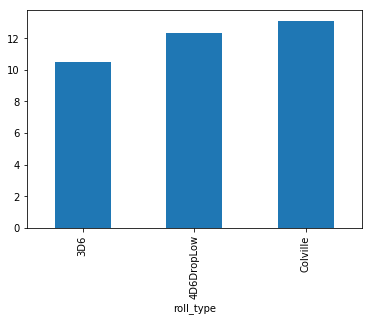

In [11]:
df.groupby('roll_type')["ability_mean"].mean().plot(kind = 'bar')

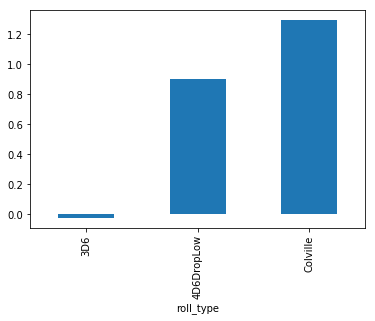

In [12]:
df.groupby('roll_type')["mod_mean"].mean().plot(kind = 'bar')

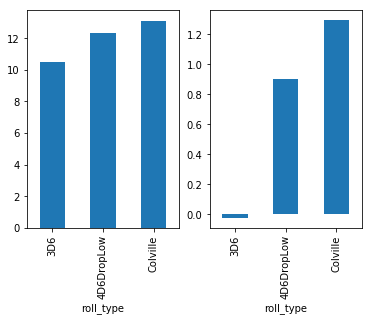

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2)

#the fig is just a place holder
#you ax1, ax2 are the graphs you pass through (also need to declare it in the plot function)
#plt.subplots(rows, columns)


df.groupby('roll_type')["ability_mean"].mean().plot(kind = 'bar',ax=ax1)
df.groupby('roll_type')['mod_mean'].mean().plot(kind = 'bar',ax=ax2)

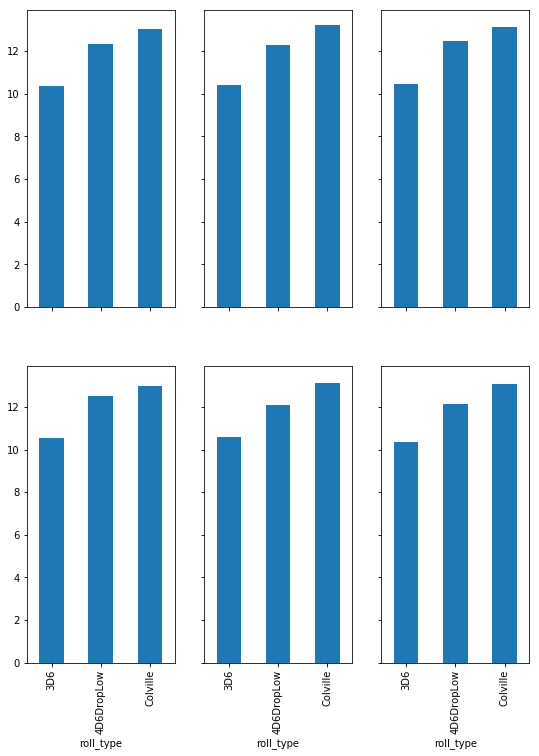

In [17]:
fig, ( (ax1,ax2,ax3) , (ax4,ax5,ax6) ) = plt.subplots(2,3, figsize = (9,12) , sharex = True, sharey = True) #need to use parenthes to group everything I want

#the fig is just a place holder
#you ax1, ax2 are the graphs you pass through (also need to declare it in the plot function)
#plt.subplots(rows, columns)


df.groupby('roll_type')["strength"].mean().plot(kind = 'bar',ax=ax1)
df.groupby('roll_type')["dexterity"].mean().plot(kind = 'bar',ax=ax2)
df.groupby('roll_type')["constitution"].mean().plot(kind = 'bar',ax=ax3)
df.groupby('roll_type')['intellegence'].mean().plot(kind = 'bar',ax=ax4)
df.groupby('roll_type')["wisdom"].mean().plot(kind = 'bar',ax=ax5)
df.groupby('roll_type')['charisma'].mean().plot(kind = 'bar',ax=ax6)

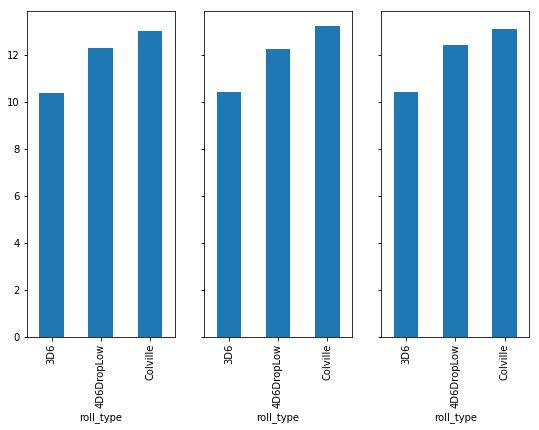

In [19]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (9,6) , sharex = True, sharey = True) #need to use parenthes to group everything I want

#the fig is just a place holder
#you ax1, ax2 are the graphs you pass through (also need to declare it in the plot function)
#plt.subplots(rows, columns)



df.groupby('roll_type')["strength"].mean().plot(kind = 'bar',ax=ax1)
df.groupby('roll_type')["dexterity"].mean().plot(kind = 'bar',ax=ax2)
df.groupby('roll_type')["constitution"].mean().plot(kind = 'bar',ax=ax3)

In [35]:
#need to learn how to graph multiple charts in jupyter notebook using a loop
"""
for i in range(1,4):
    column = df.columns[i]
    chart = str('ax') + str(i)
    df.groupby('roll_type')[column].mean().plot(kind = 'bar', ax = chart)
"""

AttributeError: 'str' object has no attribute 'get_figure'

In [74]:
for i in range(1,len(df.columns)):
    print(df.columns[i])

strength
dexterity
constitution
intellegence
wisdom
charisma
str mod
dex mod
con mod
int mod
wis mod
char mod
ability_mean
mod_mean


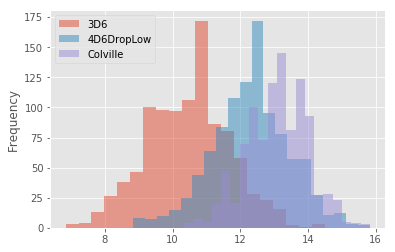

In [86]:
df.groupby('roll_type')["ability_mean"].plot(kind = 'hist',bins = 20, alpha = .5, legend = True)
plt.style.use('ggplot')

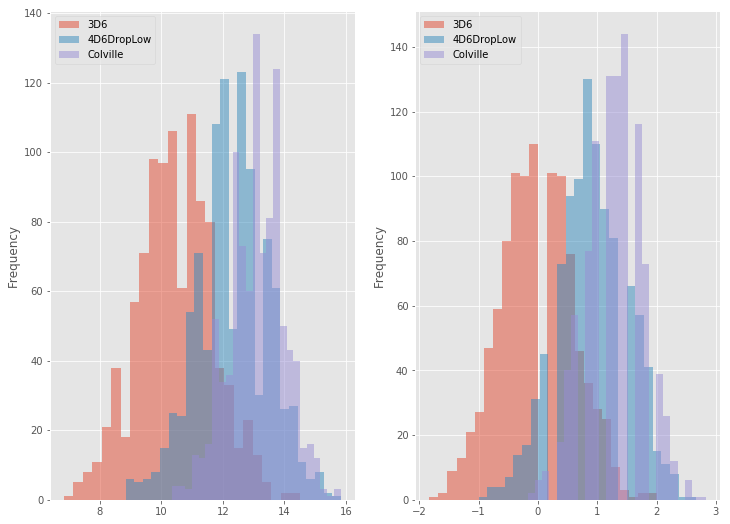

In [91]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,9))

df.groupby('roll_type')["ability_mean"].plot(kind = 'hist',bins = 25, alpha = .5, legend = True, ax = ax1)
df.groupby('roll_type')["mod_mean"].plot(kind = 'hist',bins = 25, alpha = .5, legend = True, ax = ax2)
plt.style.use('ggplot')

In [100]:
df.groupby('roll_type').corr()

ability_mean  char mod  charisma   con mod  \
roll_type                                                             
3D6        ability_mean      1.000000  0.434763  0.440860  0.315676   
           char mod          0.434763  1.000000  0.986808 -0.038236   
           charisma          0.440860  0.986808  1.000000 -0.034752   
           con mod           0.315676 -0.038236 -0.034752  1.000000   
           constitution      0.315636 -0.048210 -0.044026  0.985896   
           dex mod           0.457235  0.038772  0.029425  0.000843   
           dexterity         0.459113  0.029909  0.021030  0.001164   
           int mod           0.434415  0.001228  0.002284 -0.005914   
           intellegence      0.439001  0.000385  0.000895 -0.015345   
           mod_mean          0.986743  0.447125  0.442688  0.324865   
           str mod           0.390204  0.034063  0.040366 -0.057481   
           strength          0.396953  0.034558  0.040460 -0.059569   
           wis mod           0.384337  0.042519  0.044041 -0.088987   
           wisdom            0.383720  0.041256  0.041484 -0.090709   
4D6DropLow ability_mean      1.000000  0.442056  0.443956  0.386052   
           char mod          0.442056  1.000000  0.984991 -0.022585   
           charisma          0.443956  0.984991  1.000000 -0.019473   
           con mod           0.386052 -0.022585 -0.019473  1.000000   
           constitution      0.388638 -0.026325 -0.024609  0.984631   
           dex mod           0.433772  0.063281  0.059639 -0.007645   
           dexterity         0.443359  0.065563  0.061311 -0.001721   
           int mod           0.417623  0.026464  0.024885  0.000545   
           intellegence      0.420853  0.025197  0.021913  0.006239   
           mod_mean          0.986236  0.447840  0.438432  0.389455   
           str mod           0.360967 -0.009773 -0.014739 -0.000949   
           strength          0.364423 -0.013893 -0.017823 -0.011474   
           wis mod           0.378249  0.034590  0.033663 -0.005786   
           wisdom            0.381423  0.035070  0.034335 -0.008438   
Colville   ability_mean      1.000000  0.327691  0.324928  0.320890   
           char mod          0.327691  1.000000  0.985278 -0.076135   
           charisma          0.324928  0.985278  1.000000 -0.085203   
           con mod           0.320890 -0.076135 -0.085203  1.000000   
           constitution      0.320895 -0.080489 -0.090311  0.985726   
           dex mod           0.282135 -0.095042 -0.098595 -0.109022   
           dexterity         0.280080 -0.093454 -0.097853 -0.118957   
           int mod           0.365843 -0.024128 -0.023576 -0.042089   
           intellegence      0.362779 -0.028878 -0.028695 -0.054766   
           mod_mean          0.976446  0.335355  0.317753  0.340754   
           str mod           0.280796 -0.009864 -0.012039 -0.132929   
           strength          0.271788 -0.018955 -0.021367 -0.141751   
           wis mod           0.287847 -0.126761 -0.131791  0.017388   
           wisdom            0.285353 -0.136116 -0.139264  0.013918   

                         constitution   dex mod  dexterity   int mod  \
roll_type                                                              
3D6        ability_mean      0.315636  0.457235   0.459113  0.434415   
           char mod         -0.048210  0.038772   0.029909  0.001228   
           charisma         -0.044026  0.029425   0.021030  0.002284   
           con mod           0.985896  0.000843   0.001164 -0.005914   
           constitution      1.000000 -0.001277  -0.000364 -0.006176   
           dex mod          -0.001277  1.000000   0.986812  0.047988   
           dexterity        -0.000364  0.986812   1.000000  0.055163   
           int mod          -0.006176  0.047988   0.055163  1.000000   
           intellegence     -0.015556  0.056472   0.063740  0.986165   
           mod_mean          0.312358  0.464723   0.456622  0.434511   
           str mod          -0.05442

In [105]:
df[df['roll_type'] == "Colville"][['strength',"dexterity"]].corr()

,strength,dexterity
strength,1.000000,-0.123448
dexterity,-0.123448,1.000000


In [106]:
df[df['roll_type'] == "Colville"].loc[:,"strength":"wisdom"].corr()

,strength,dexterity,constitution,intellegence,wisdom
strength,1.000000,-0.123448,-0.154896,-0.084358,-0.093003
dexterity,-0.123448,1.000000,-0.111523,-0.036910,-0.119282
constitution,-0.154896,-0.111523,1.000000,-0.057168,0.012713
intellegence,-0.084358,-0.036910,-0.057168,1.000000,-0.150140
wisdom,-0.093003,-0.119282,0.012713,-0.150140,1.000000


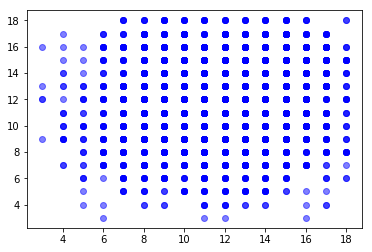

In [38]:
plt.scatter(df['strength'],df['dexterity'], alpha = .5, color = 'blue')

In [41]:
df[df['roll_type']=='Colville'][ ['strength','str mod'] ].corr()

,strength,str mod
strength,1.000000,0.985411
str mod,0.985411,1.000000


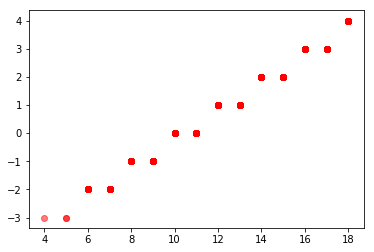

In [51]:
df1 = df[df['roll_type']=='Colville']
plt.scatter(df1['strength'], df1['str mod'], alpha = .5, color = 'red')

End of blog post 2.  Need to type up some of this stuff and then should be good to go.  